# 🛍️ Shopping Trends & Customer Behavior Analysis

Welcome to this deep dive into the world of e-commerce and consumer insights!  
In this notebook, we unravel the underlying patterns of shopping behaviors and uncover what truly drives purchasing decisions.

### 🔍 What We’ll Explore

- 👥 **Demographic Analysis**  
  Understanding who the customers are — by age, gender, location, and beyond.

- 💸 **Purchase Behavior**  
  Investigating how customers shop, spend, and interact with different product categories.

- ❤️ **Customer Preferences**  
  Identifying favored items, popular trends, and loyalty indicators.

- 🔄 **Behavioral Analysis**  
  Digging into temporal patterns, repeat purchase trends, and seasonal effects.

- 🧠 **Feature Engineering**  
  Creating new insights from raw data to empower our models.

- 🤖 **Machine Learning Modeling**  
  Building predictive models to determine the most dominant features influencing purchase amounts.

Let’s gear up to transform raw data into actionable intelligence!  
*Because every transaction tells a story — and we’re here to read between the lines.* ✨


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shopping-trends-and-customer-behaviour-dataset/Shopping Trends And Customer Behaviour Dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/shopping-trends-and-customer-behaviour-dataset/Shopping Trends And Customer Behaviour Dataset.csv")

## Overview of the Dataframe

In [4]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Color                   3900 non-null   object 
 8   Season                  3900 non-null   object 
 9   Review Rating           3900 non-null   float64
 10  Subscription Status     3900 non-null   object 
 11  Shipping Type           3900 non-null   object 
 12  Discount Applied        3900 non-null   object 
 13  Promo Code Used         3900 non-null   object 
 14  Previous Purchases      3900 non-null   

## Binning Age Group

In [7]:
df['Age_Group'] = pd.cut(df['Age'], 
                         bins=[0, 25, 40, 60, 100],
                         labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

## Demographic Analysis

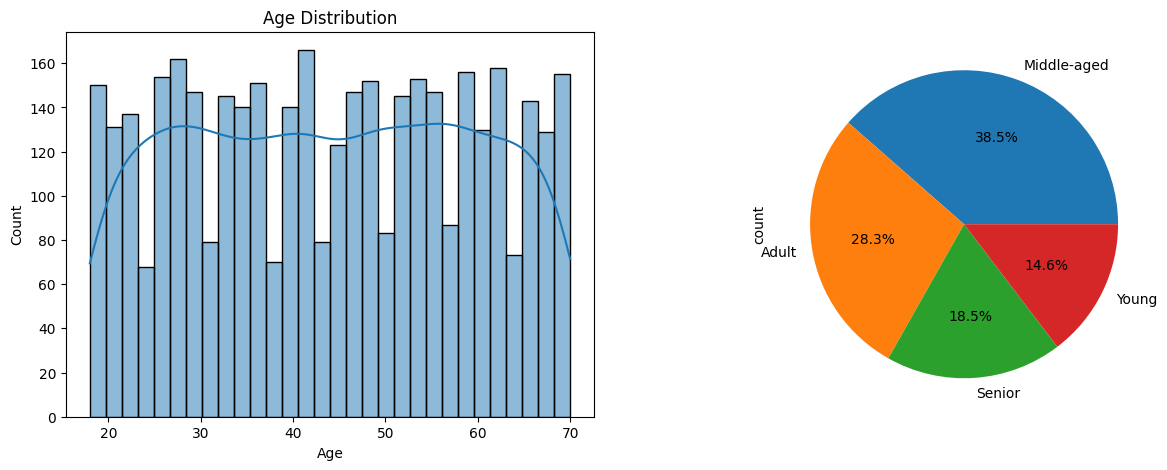

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0])
ax[0].set_title('Age Distribution')
df['Age_Group'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
plt.show()

## Purchase Behavior

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df, ax=ax[0,0])
sns.countplot(x='Season', hue='Category', data=df, ax=ax[0,1])
sns.barplot(x='Payment Method', y='Purchase Amount (USD)', data=df, ax=ax[1,0])
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Season', data=df, ax=ax[1,1])
plt.tight_layout()

## Customer Preferences

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.crosstab(df['Category'], df['Color']), 
            annot=True, cmap='YlGnBu')
plt.title('Color Preferences by Category')

## Behavioral Analysis

<Axes: >

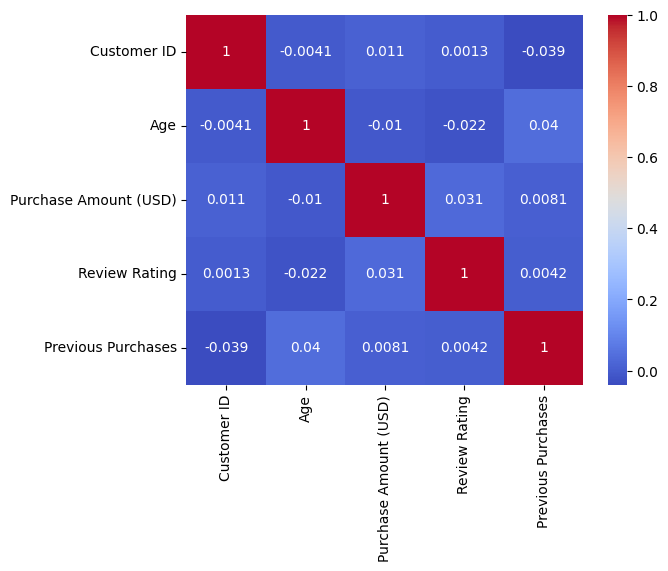

In [11]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Feature Engineering

In [12]:
df = pd.get_dummies(df, columns=['Season', 'Shipping Type', 'Payment Method'])
df['Discount_Effectiveness'] = df['Purchase Amount (USD)'] / df['Previous Purchases']

## Machine Learning Model (Purchase Amount Prediction)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop(['Purchase Amount (USD)'], axis=1)
y = df_encoded['Purchase Amount (USD)']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation (optional but helpful!)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 0.9135512820512824
R² Score: 0.996904424716922


## Determining Key Features

<Axes: >

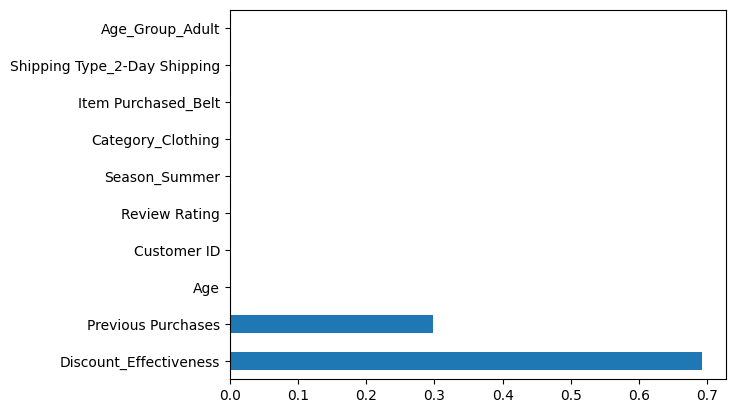

In [14]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')